In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
ames = pd.read_csv("AmesHousing.csv")

good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

ames = ames.dropna()

In [ ]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", Ridge(alpha=1))]
)

In [ ]:
cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')

array([0.89815807, 0.91744024, 0.79493606, 0.78522563, 0.91389818])

In [ ]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge", Ridge())]
)

alphas = {
  'ridge__alpha': [0.001, 0.01, 0.1, 1, 10]
}

gscv = GridSearchCV(lr_pipeline_1, alphas, cv=5, scoring='r2')

gscv_fitted = gscv.fit(X, y)

In [ ]:
params_df = pd.DataFrame(gscv_fitted.cv_results_["params"])

results_df = params_df.assign(scores=gscv_fitted.cv_results_["mean_test_score"])

results_df.sort_values(by="scores", ascending=False)

,ridge__alpha,scores
4,10.000,0.864272
3,1.000,0.861932
2,0.100,0.856302
1,0.010,0.854186
0,0.001,0.853920


In [ ]:
# Finding coefficient of the best ridge regression

ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(drop = "first", sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge", Ridge(alpha=10))]
)

pipeline_fit = lr_pipeline_1.fit(X, y)
ridge_coefficients = pipeline_fit.named_steps["ridge"].coef_
feature_names_ridge = pipeline_fit.named_steps["preprocessing"].get_feature_names_out()

ridge_df = pd.DataFrame({
    "Feature": feature_names_ridge,
    "Coefficient": ridge_coefficients,
    "Type": "Ridge"
})

In [ ]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("lasso", Lasso())]
)

alphas = {
  'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]
}

gscv = GridSearchCV(lr_pipeline_1, alphas, cv=5, scoring='r2')

gscv_fitted = gscv.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.894e+11, tolerance: 1.463e

In [ ]:
params_df = pd.DataFrame(gscv_fitted.cv_results_["params"])

results_df = params_df.assign(scores=gscv_fitted.cv_results_["mean_test_score"])

results_df.sort_values(by="scores", ascending=False)

,lasso__alpha,scores
4,10.000,0.860632
3,1.000,0.857152
2,0.100,0.856618
1,0.010,0.855606
0,0.001,0.855499


In [ ]:
# Finding coefficient of the best lasso regression

ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(drop = "first", sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("lasso", Lasso(alpha=10))]
)

pipeline_fit = lr_pipeline_1.fit(X, y)
lasso_coefficients = pipeline_fit.named_steps["lasso"].coef_
feature_names_lasso = pipeline_fit.named_steps["preprocessing"].get_feature_names_out()

lasso_df = pd.DataFrame({
    "Feature": feature_names_lasso,
    "Coefficient": lasso_coefficients,
    "Type": "Lasso"
})


In [ ]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("elastic_net", ElasticNet())]
)

alphas = {
  'elastic_net__l1_ratio': [0.2, 0.4, 0.6, 0.8, 10],
  'elastic_net__alpha': [0.001, 0.01, 0.1, 1, 10]
}

gscv = GridSearchCV(lr_pipeline_1, alphas, cv=5, scoring='r2')

gscv_fitted = gscv.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.410e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.202e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.096e+11, tolerance: 1.463e

In [ ]:
params_df = pd.DataFrame(gscv_fitted.cv_results_["params"])

results_df = params_df.assign(scores=gscv_fitted.cv_results_["mean_test_score"])

results_df.sort_values(by="scores", ascending=False)

,elastic_net__alpha,elastic_net__l1_ratio,scores
7,0.010,0.100,0.863848
6,0.010,0.010,0.863703
5,0.010,0.001,0.863688
0,0.001,0.001,0.863191
1,0.001,0.010,0.863180
2,0.001,0.100,0.863061
23,10.000,1.000,0.860632
18,1.000,1.000,0.857152
13,0.100,1.000,0.856618
8,0.010,1.000,0.855606


In [ ]:
df_coef = pd.concat([lasso_df, ridge_df])

,Feature,Coefficient,Type
0,dummify__MS Zoning_FV,942.758392,Lasso
1,dummify__MS Zoning_I (all),-0.000000,Lasso
2,dummify__MS Zoning_RH,6872.602683,Lasso
3,dummify__MS Zoning_RL,4019.916332,Lasso
4,dummify__MS Zoning_RM,0.000000,Lasso
...,...,...,...
216,standardize__Screen Porch,3139.393246,Ridge
217,standardize__Pool Area,384.891621,Ridge
218,standardize__Misc Val,-4144.934664,Ridge
219,standardize__Mo Sold,-588.802123,Ridge


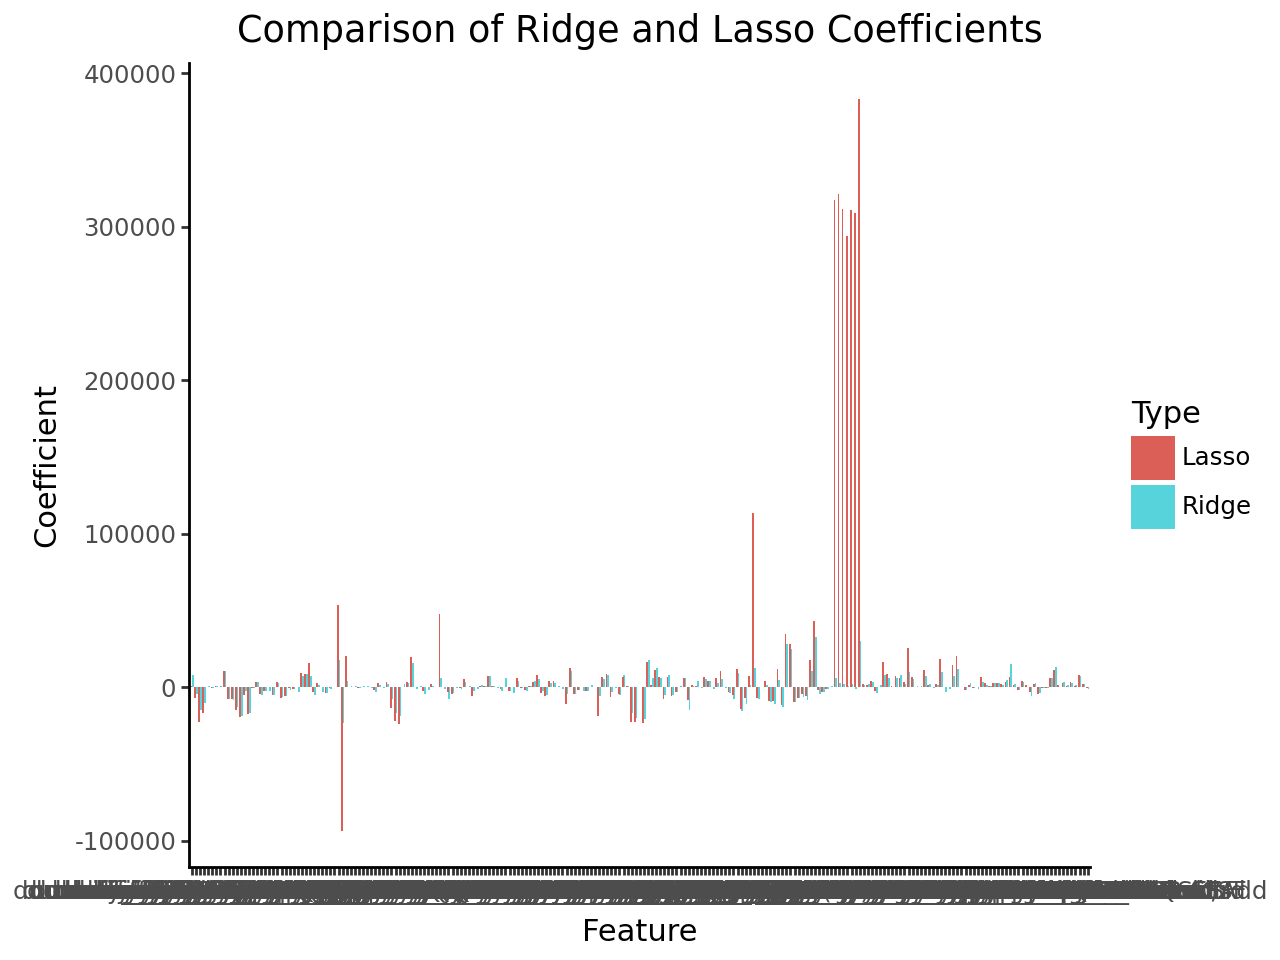

In [ ]:
from plotnine import ggplot, geom_bar, aes, labs, theme_classic, position_dodge

(ggplot(df_coef, aes(x="Feature", y="Coefficient", fill="Type")) +
 geom_bar(stat="identity", position=position_dodge(width=0.8)) +
 labs(x="Feature", y="Coefficient", title="Comparison of Ridge and Lasso Coefficients") +
 theme_classic())